# SARIMAX

## Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
So far the models we've looked at consider past values of a dataset and past errors to determine future trends, seasonality and forecasted values. We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font><br>
<strong>
<a href='https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_sarimax_stata.html'>Statsmodels Example:</a></strong>&nbsp;&nbsp;<font color=black>SARIMAX</font></div>

In [67]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima.arima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

In [2]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [3]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [5]:
df1 = df.dropna()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [7]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [8]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [11]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


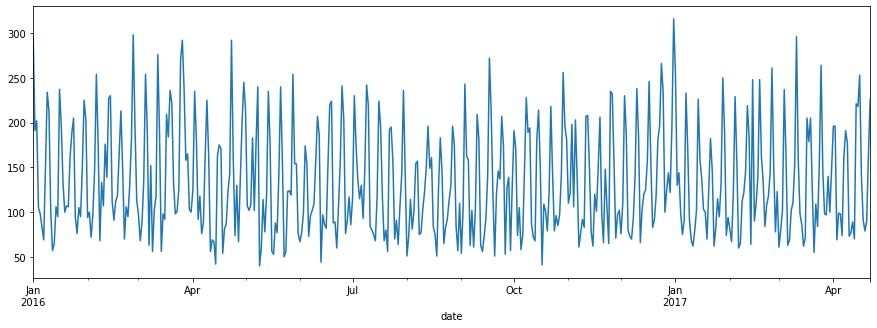

In [24]:
df1['total'].plot(figsize=(15,5));

In [15]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

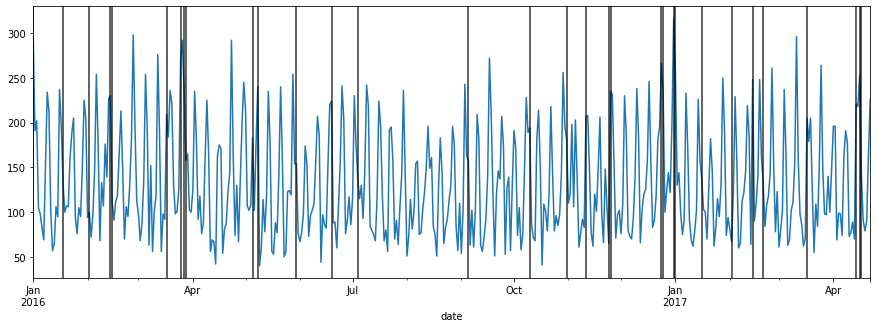

In [23]:
ax = df1['total'].plot(figsize=(15,5))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8);

### Run an ETS Decomposition

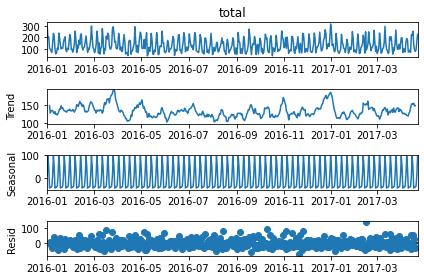

In [20]:
result = seasonal_decompose(df1['total'])
result.plot();

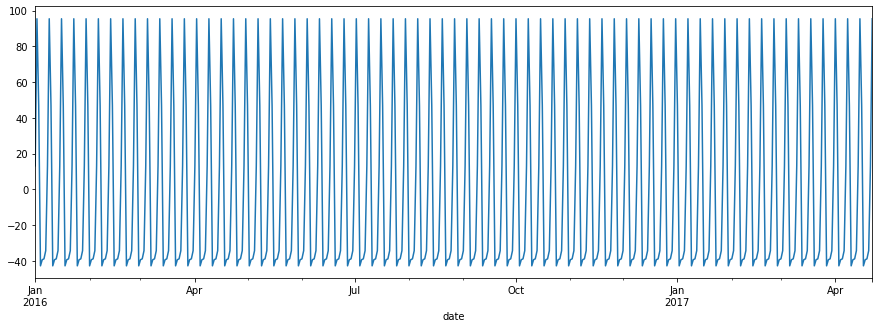

In [22]:
result.seasonal.plot(figsize=(15,5));

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [52]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.133
Date:                   Fri, 04 Mar 2022   AIC                           4776.267
Time:                           12:17:42   BIC                           4792.945
Sample:                                0   HQIC                          4782.824
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4421      1.822      2.986      0.003       1.870       9.014
ar.S.L7        0.9596      0.013     71.796      0.000       0.933       0.986
ma.S.L7       -0.7386      0.050    -14.634      0.000      -0.838      -0.640
sigma2      1237.8918     74.072     16.712      0.000    1092.713    1383.071
===================================================================================
Ljung-Box (L1) (Q):                  15.96   Jarque-Bera (JB):                58.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.72
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fit a SARIMA(0,0,0)(1,0,1,7) Model
NOTE: To avoid a <tt>ValueError: non-invertible starting MA parameters found</tt> we're going to set <tt>enforce_invertibility</tt> to False.

In [63]:
model = SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7))

In [64]:
results = model.fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Fri, 04 Mar 2022   AIC                           4336.738
Time:                           12:30:36   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.196      0.000      -0.985      -0.891
sigma2      1111.8108     58.739     18.928      0.000     996.685    1226.936
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
len(df1)

478

In [26]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [53]:
start = len(train)
end = len(train) + len(test) - 1

In [54]:
preds = results.predict(start, end).rename('SARIMA Model')

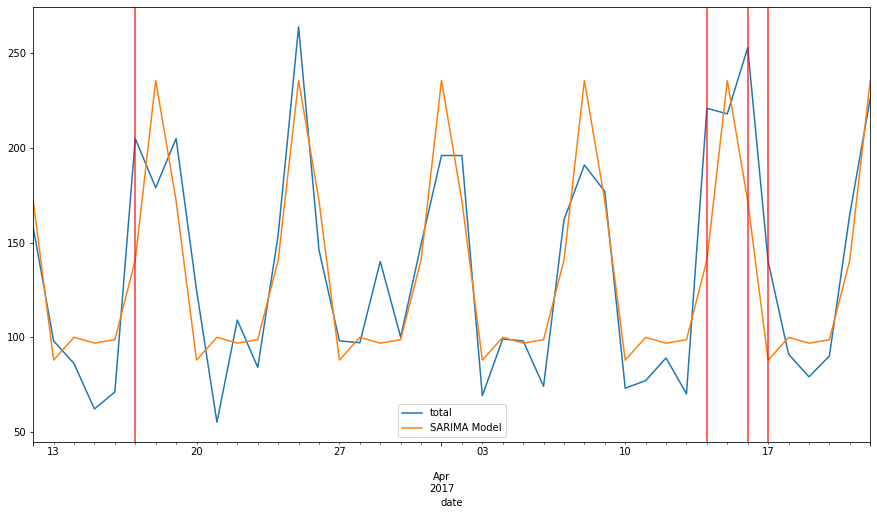

In [59]:
ax = test['total'].plot(figsize=(15,8), legend = True)
preds.plot(legend = True)

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='red', alpha=0.8);

### Evaluate the Model

In [66]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], preds)
error2 = rmse(test['total'], preds)

print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.520043
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91426082


## Now add the exog variable

In [70]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2348.434
Date:                             Fri, 04 Mar 2022   AIC                           4708.867
Time:                                     12:38:15   BIC                           4733.885
Sample:                                 01-01-2016   HQIC                          4718.703
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3343      2.873      5.338      0.000       9.704      20.965
holiday       46.3819      4.433     10.463      0.000      37.693      55.070
ar.L1          0.0897      0.047      1.911      0.056      -0.002       0.182
ar.S.L7        0.8804      0.022     39.679      0.000       0.837       0.924
ma.S.L7       -0.5316      0.061     -8.732      0.000      -0.651      -0.412
sigma2      1051.8358     73.406     14.329      0.000     907.962    1195.709
===================================================================================
Ljung-Box (L1) (Q):                   7.59   Jarque-Bera (JB):                 8.94
Prob(Q):                              0.01   Prob(JB):                         0.01
Heteroskedasticity (H):               0.88   Skew:                             0.33
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,0), seasonal_order=(1,0,1,7))

In [72]:
result = model.fit()

In [73]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Fri, 04 Mar 2022   AIC                           4188.124
Time:                                     13:20:22   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5073      3.764     18.203      0.000      61.131      75.884
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   9.01e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9460      0.023    -41.611      0.000      -0.991      -0.901
sigma2       783.4362     45.151     17.351      0.000     694.942     871.930
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
preds = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

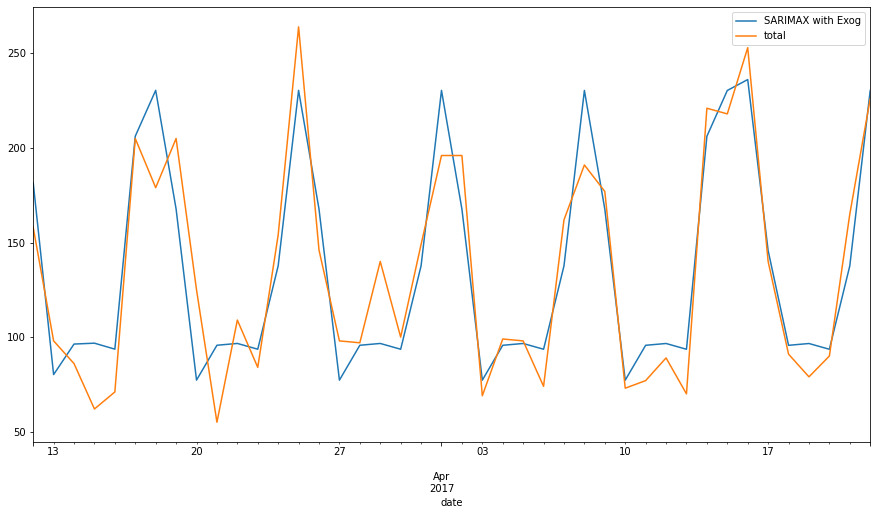

In [77]:
preds.plot(figsize=(15,8), legend=True),
test['total'].plot(legend=True);

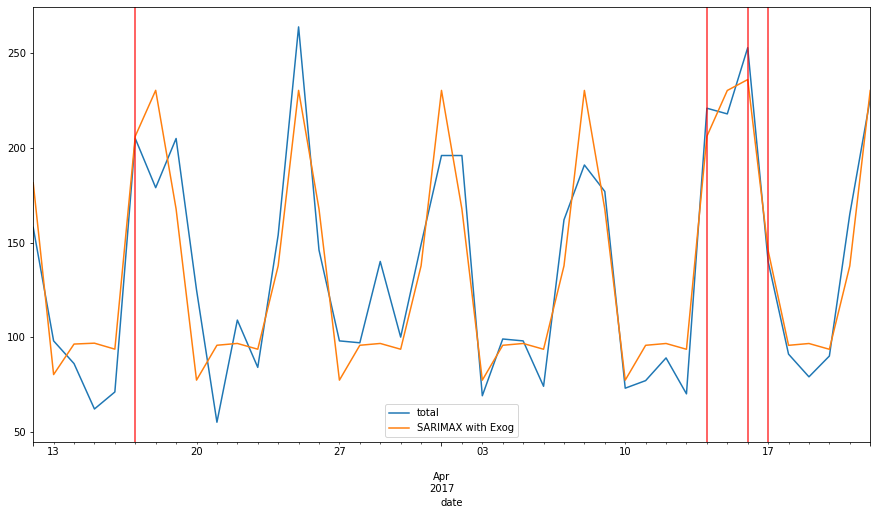

In [78]:
ax = test['total'].plot(figsize=(15,8), legend = True)
preds.plot(legend = True)

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='red', alpha=0.8);

In [79]:
rmse(test['total'], preds)

23.26571200012209

### Retrain the model on the full data, and forecast the future
We're going to forecast 39 days into the future, and use the additional holiday data

In [80]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1,0,0), seasonal_order=(1,0,1,7))

In [82]:
results = model.fit()

In [85]:
# df[477:]

In [86]:
exog_forecast = df[478:][['holiday']]

In [88]:
forecast = results.predict(len(df1), len(df1) + 38, exog= exog_forecast).rename('Final SARIMAX Forecast')

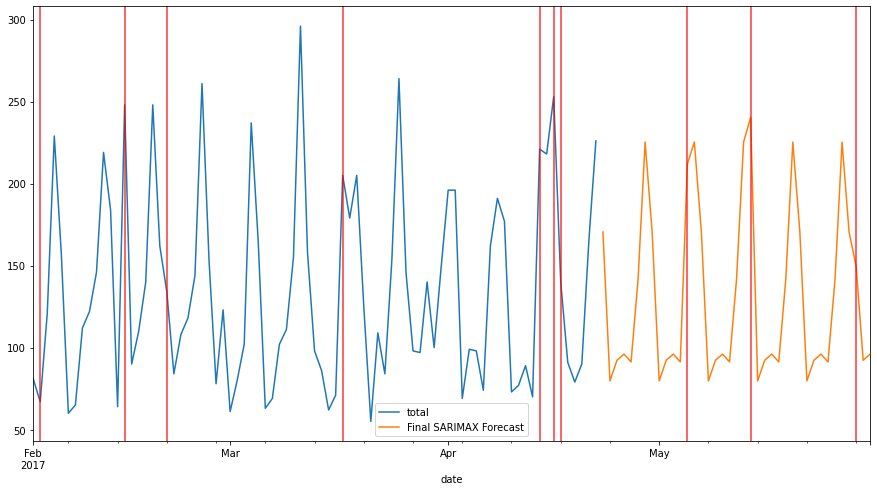

In [95]:
ax = df1['total'].loc['2017-02-01':].plot(figsize=(15,8), legend=True)
forecast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='red', alpha=0.8);